In [27]:
# Add the parent directory to sys.path
import sys, os
from pathlib import Path

current_directory = os.getcwd()
parent_directory = Path(current_directory).parent.parent
sys.path.insert(0, str(parent_directory))
sys.path

['c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\DLLs',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\Lib',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv',
 '',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\win32',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\win32\\lib',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\Pythonwin']

# Connect to database

In [28]:
# Import the utils moudle
from scripts import utils

In [29]:
# Load the credentialsand connect to database
CREDENTIALS  = utils.load_environment_variables(parent_directory=parent_directory)
connection = utils.connect_to_database({"dbname": CREDENTIALS['DB_NAME'],
                                 "user": CREDENTIALS['USER'],
                                 "host": CREDENTIALS['host'],
                                 "port": CREDENTIALS['port']})

INFO:scripts.utils:Trying to load environment variables from c:\Users\mekbi\Desktop\Kifiya\week-2\telecom-data-analysis/.env
INFO:scripts.utils:Credentials loaded successfully
INFO:scripts.utils:Attempting to connect to the database
INFO:scripts.utils:Connection successful


In [30]:
# Load the db files into pandas dataframe and close the connection
table_name = 'xdr_data'
df = utils.load_data_from_db(conn=connection,
                       table_name=table_name)
utils.close_database_connection(conn=connection)

INFO:root:Executing query: SELECT * FROM xdr_data
c:\Users\mekbi\Desktop\Kifiya\week-2\telecom-data-analysis\scripts\utils.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
INFO:scripts.utils:Data loaded into DataFrame successfully
INFO:root:Database connection closed successfully


### Data preparation and cleaning

In [31]:
# Replace outliers
from scripts import experience_utils
relevant_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                    'Handset Type']
modified_df = experience_utils.tukeys_fence(df=df,
                                            columns=relevant_columns[:-1])

INFO:root:Q1, Q3, and IQR calculated successfully
INFO:root:Lower bound and upper bound calculated successfully
INFO:root:Tukey's Fence applied successfully


In [32]:
# Inspect missing values
from scripts.data_processing import MissingValueHandler
missing_value_handler = MissingValueHandler(df=modified_df[relevant_columns])
missing_value_handler.missing_value_percentage()

INFO:root:MissingValueHandler instance created
INFO:root:Missing value percentage computed successfully


Avg RTT DL (ms)                18.552543
Avg RTT UL (ms)                18.541210
Avg Bearer TP DL (kbps)         0.000667
Avg Bearer TP UL (kbps)         0.000667
TCP DL Retrans. Vol (Bytes)    58.763608
TCP UL Retrans. Vol (Bytes)    64.432237
Handset Type                    0.381331
dtype: float64

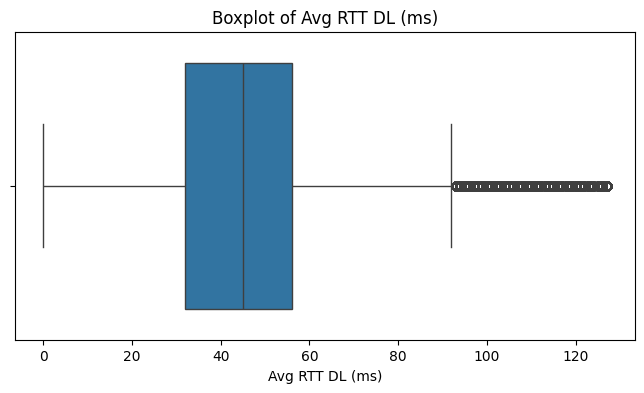

INFO:root:Boxplot for column 'Avg RTT DL (ms)' displayed successfully


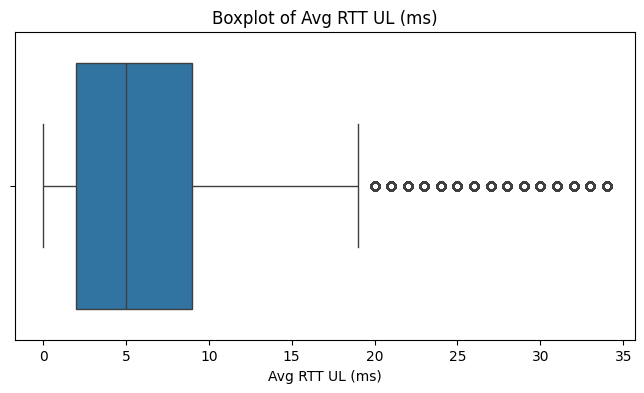

INFO:root:Boxplot for column 'Avg RTT UL (ms)' displayed successfully


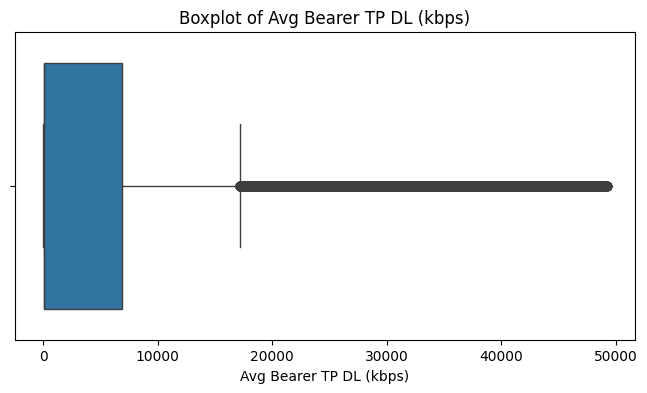

INFO:root:Boxplot for column 'Avg Bearer TP DL (kbps)' displayed successfully


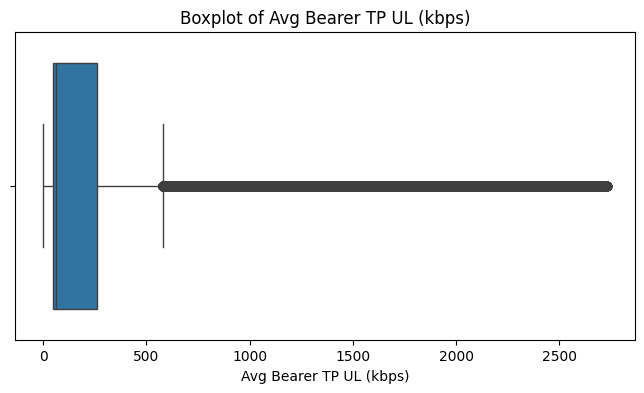

INFO:root:Boxplot for column 'Avg Bearer TP UL (kbps)' displayed successfully


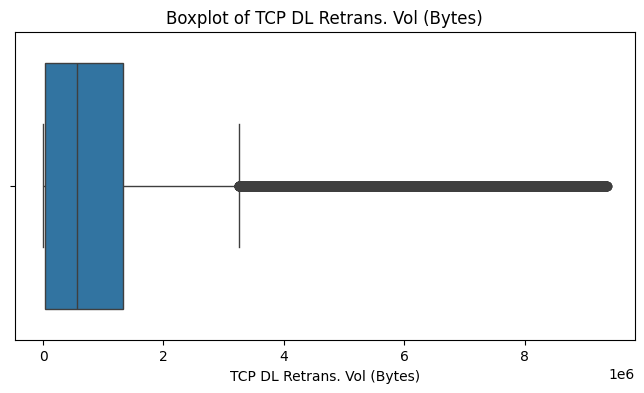

INFO:root:Boxplot for column 'TCP DL Retrans. Vol (Bytes)' displayed successfully


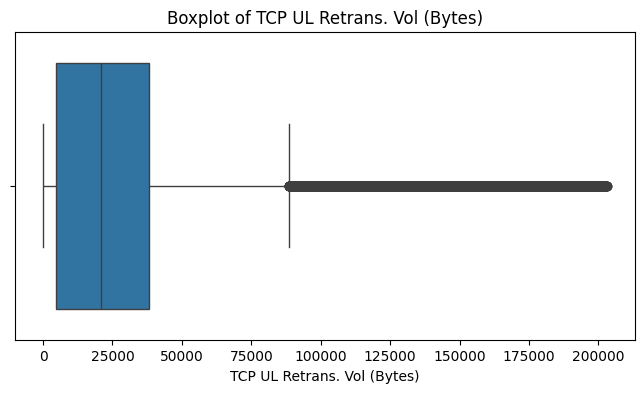

INFO:root:Boxplot for column 'TCP UL Retrans. Vol (Bytes)' displayed successfully


In [33]:
# Inspect outliers
missing_value_handler.inspect_outliers()

In [37]:
# Fill missing numerical values with the mean
for column in relevant_columns[:-1]:
    modified_df[column].fillna(modified_df[column].mean(), inplace=True)

# Fill missing Handset Type with the mode
modified_df['Handset Type'].fillna(modified_df['Handset Type'].mode()[0], inplace=True)
df.head()

C:\Users\mekbi\AppData\Local\Temp\ipykernel_9180\3620034550.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  modified_df[column].fillna(modified_df[column].mean(), inplace=True)
C:\Users\mekbi\AppData\Local\Temp\ipykernel_9180\3620034550.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [38]:
# Inspect the new data frame
missing_value_handler = MissingValueHandler(modified_df[relevant_columns])
missing_value_handler.missing_value_summary()

INFO:root:MissingValueHandler instance created


INFO:root:Missing value summary computed successfully


Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Handset Type                   0
dtype: int64

### Data aggregation

In [39]:
# Aggregate relevant columns per user
aggregation_methods = {
    'Avg RTT DL (ms)': 'sum', 
    'Avg RTT UL (ms)': 'sum',
    'Avg Bearer TP DL (kbps)': 'sum', 
    'Avg Bearer TP UL (kbps)': 'sum',
    'TCP DL Retrans. Vol (Bytes)': 'sum', 
    'TCP UL Retrans. Vol (Bytes)': 'sum',
    'Handset Type': lambda x: x.mode()[0] #  Most frequent Handset Type per customer
}
relevant_df = modified_df.groupby('MSISDN/Number').agg(aggregation_methods).reset_index()
relevant_df.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
0,3.360100e+10,46.000000,0.000000,37.0,39.0,1.203618e+06,31947.60397,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,30.000000,1.000000,48.0,51.0,1.203618e+06,31947.60397,Apple iPhone 7 (A1778)
2,3.360100e+10,46.991676,7.621414,48.0,49.0,1.203618e+06,31947.60397,undefined
3,3.360101e+10,69.000000,15.000000,204.0,44.0,1.066000e+03,31947.60397,Apple iPhone 5S (A1457)
4,3.360101e+10,114.000000,5.000000,40395.0,103.0,1.055325e+07,53149.60397,Apple iPhone Se (A1723)


### Throughput data per handset

In [45]:
agg_method = {'Avg Bearer TP DL (kbps)': 'sum', 
              'Avg Bearer TP UL (kbps)': 'sum',}
TP_data_per_handset = relevant_df.groupby('Handset Type').agg(agg_method).reset_index()
TP_data_per_handset.head()

,Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,A-Link Telecom I. Cubot A5,23184.0,326.0
1,A-Link Telecom I. Cubot Note Plus,6527.0,172.0
2,A-Link Telecom I. Cubot Note S,8515.0,422.0
3,A-Link Telecom I. Cubot Nova,63.0,550.0
4,A-Link Telecom I. Cubot Power,63.0,342.0


<Figure size 1200x600 with 0 Axes>

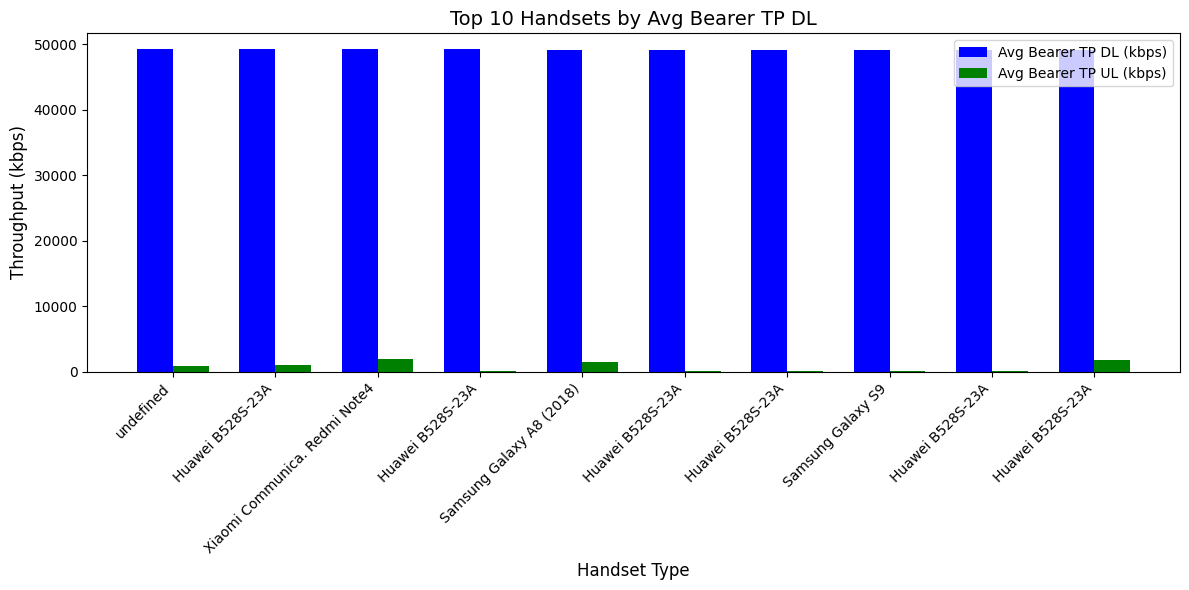

In [46]:
# Plot the top 10 handsets with largest Throughput download
import matplotlib.pyplot as plt
top_10 = df.sort_values(by='Avg Bearer TP DL (kbps)', ascending=False).head(10)
plt.figure(figsize=(12, 6))

# Plotting
plt.figure(figsize=(12, 6))

# Set the positions and width for the bars
bar_width = 0.35
index = range(len(top_10))

# Bar plots for DL and UL speeds
plt.bar(index, top_10['Avg Bearer TP DL (kbps)'], bar_width, label='Avg Bearer TP DL (kbps)', color='b')
plt.bar([i + bar_width for i in index], top_10['Avg Bearer TP UL (kbps)'], bar_width, label='Avg Bearer TP UL (kbps)', color='g')

# Adding labels and titles
plt.xlabel('Handset Type', fontsize=12)
plt.ylabel('Throughput (kbps)', fontsize=12)
plt.title('Top 10 Handsets by Avg Bearer TP DL', fontsize=14)

# Add x-ticks with handset names
plt.xticks([i + bar_width / 2 for i in index], top_10['Handset Type'], rotation=45, ha="right")

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

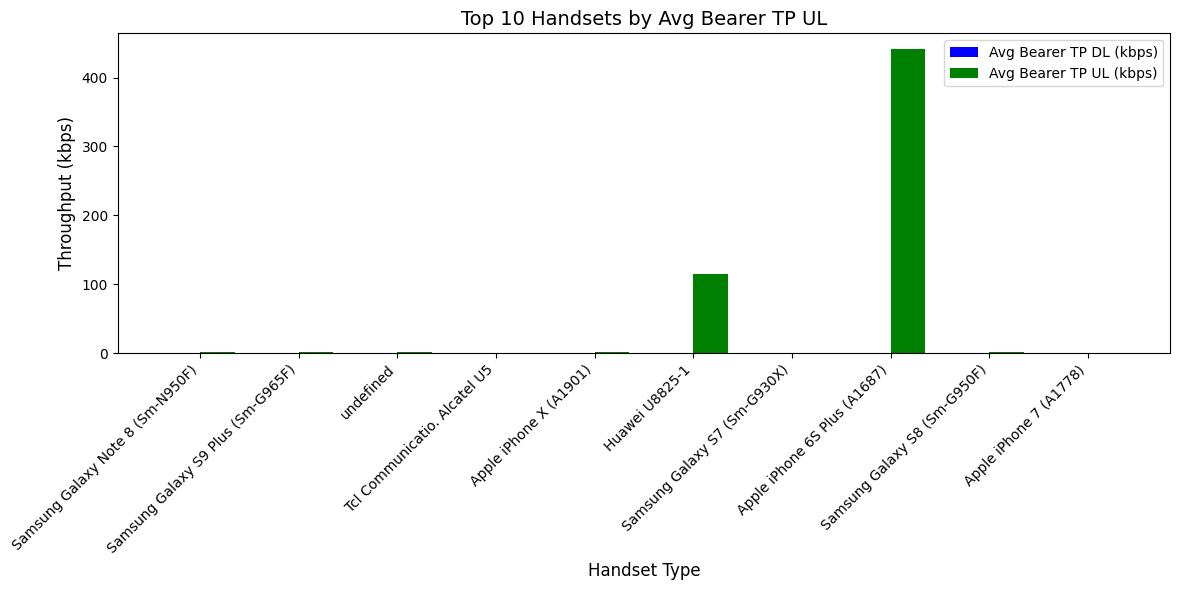

In [47]:
# Plot the top 10 handsets with largest Throughput upload
top_10 = df.sort_values(by='Avg Bearer TP DL (kbps)', ascending=True).head(10)
plt.figure(figsize=(12, 6))

# Plotting
plt.figure(figsize=(12, 6))

# Set the positions and width for the bars
bar_width = 0.35
index = range(len(top_10))

# Bar plots for DL and UL speeds
plt.bar(index, top_10['Avg Bearer TP DL (kbps)'], bar_width, label='Avg Bearer TP DL (kbps)', color='b')
plt.bar([i + bar_width for i in index], top_10['Avg Bearer TP UL (kbps)'], bar_width, label='Avg Bearer TP UL (kbps)', color='g')

# Adding labels and titles
plt.xlabel('Handset Type', fontsize=12)
plt.ylabel('Throughput (kbps)', fontsize=12)
plt.title('Top 10 Handsets by Avg Bearer TP UL', fontsize=14)

# Add x-ticks with handset names
plt.xticks([i + bar_width / 2 for i in index], top_10['Handset Type'], rotation=45, ha="right")

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### TCP data per handset

In [49]:
agg_method = {'TCP DL Retrans. Vol (Bytes)': 'sum', 
              'TCP UL Retrans. Vol (Bytes)': 'sum',}
TCP_data_per_handset = relevant_df.groupby('Handset Type').agg(agg_method).reset_index()
TCP_data_per_handset.head()

,Handset Type,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
0,A-Link Telecom I. Cubot A5,1.203618e+06,31947.60397
1,A-Link Telecom I. Cubot Note Plus,6.023490e+05,13864.00000
2,A-Link Telecom I. Cubot Note S,5.687300e+05,67252.00000
3,A-Link Telecom I. Cubot Nova,1.358400e+05,1330.00000
4,A-Link Telecom I. Cubot Power,7.799000e+03,242.00000


<Figure size 1200x600 with 0 Axes>

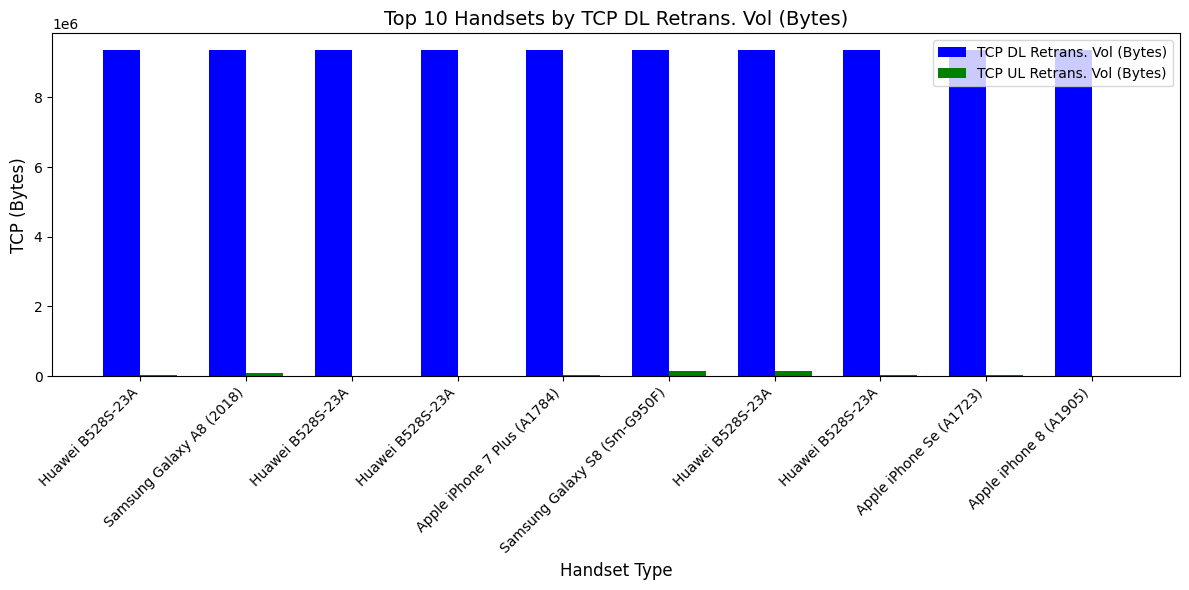

In [50]:
# Plot the top 10 handsets with largest TCP download
top_10 = df.sort_values(by='TCP DL Retrans. Vol (Bytes)', ascending=False).head(10)
plt.figure(figsize=(12, 6))

# Plotting
plt.figure(figsize=(12, 6))

# Set the positions and width for the bars
bar_width = 0.35
index = range(len(top_10))

# Bar plots for DL and UL speeds
plt.bar(index, top_10['TCP DL Retrans. Vol (Bytes)'], bar_width, label='TCP DL Retrans. Vol (Bytes)', color='b')
plt.bar([i + bar_width for i in index], top_10['TCP UL Retrans. Vol (Bytes)'], bar_width, label='TCP UL Retrans. Vol (Bytes)', color='g')

# Adding labels and titles
plt.xlabel('Handset Type', fontsize=12)
plt.ylabel('TCP (Bytes)', fontsize=12)
plt.title('Top 10 Handsets by TCP DL Retrans. Vol (Bytes)', fontsize=14)

# Add x-ticks with handset names
plt.xticks([i + bar_width / 2 for i in index], top_10['Handset Type'], rotation=45, ha="right")

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

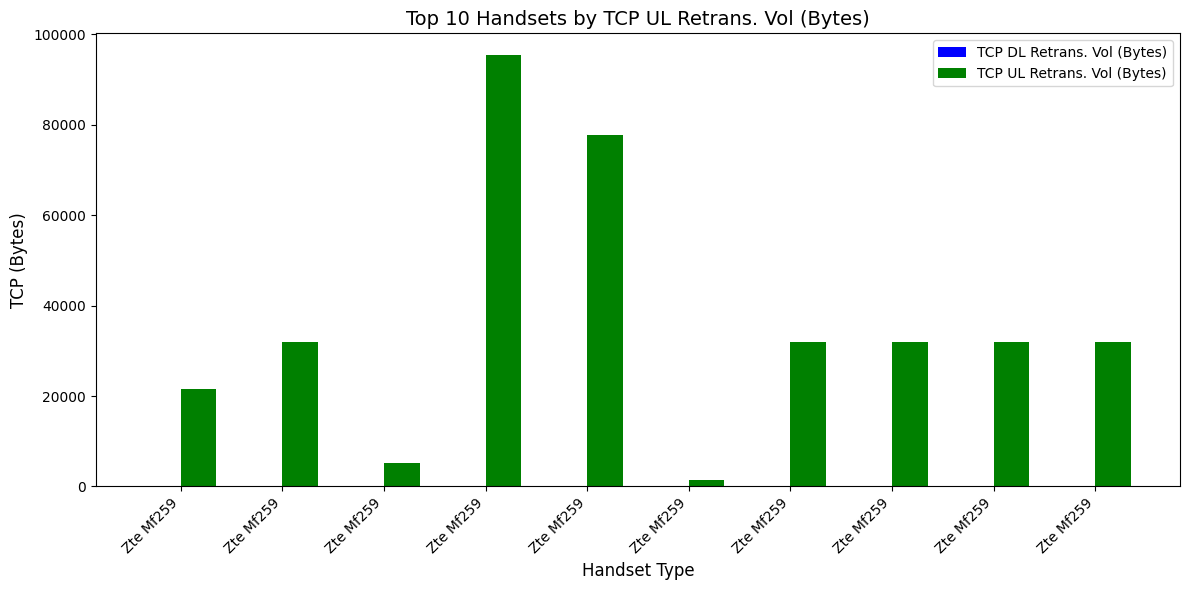

In [51]:
# Plot the top 10 handsets with largest TCP upload
top_10 = df.sort_values(by='TCP DL Retrans. Vol (Bytes)', ascending=True).head(10)
plt.figure(figsize=(12, 6))

# Plotting
plt.figure(figsize=(12, 6))

# Set the positions and width for the bars
bar_width = 0.35
index = range(len(top_10))

# Bar plots for DL and UL speeds
plt.bar(index, top_10['TCP DL Retrans. Vol (Bytes)'], bar_width, label='TCP DL Retrans. Vol (Bytes)', color='b')
plt.bar([i + bar_width for i in index], top_10['TCP UL Retrans. Vol (Bytes)'], bar_width, label='TCP UL Retrans. Vol (Bytes)', color='g')

# Adding labels and titles
plt.xlabel('Handset Type', fontsize=12)
plt.ylabel('TCP (Bytes)', fontsize=12)
plt.title('Top 10 Handsets by TCP UL Retrans. Vol (Bytes)', fontsize=14)

# Add x-ticks with handset names
plt.xticks([i + bar_width / 2 for i in index], top_10['Handset Type'], rotation=45, ha="right")

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()